3.1 Convergence and attractors

Truc important à savoir pour cette partie :

- Les poids c'est la mémoire qu'on a sur des patterns donnés$
- J'ai repris et adapté la fonction de Marie Ange pour le training Il faut bel et bien faire une boucle avec le nombre d'itération et ne pas s'arréter dès qu'on a un point fixe (car il y a potentiellement plusieurs points fixe, enfin je crois....)

In [1]:
import numpy as np

def compute_weights(X):
    P = X.shape[0]
    outer_products = [np.array([np.outer(X[i], X[i])]) for i in range(P)]  #W = X @ X.T
    W = 0
    for i in range(len(outer_products)):
        W += outer_products[i]
    return W[0, :, :]
    # return W[0, :, :]/float(N) #for section 3.3

def sgnWX(W, X, i):
    #print(len(W@X[i]))
    return np.where(W@X[i] >= 0, 1, -1)

def generate_data(d_type):
    # For task 3.1
    if d_type == "original":
        x1d = [-1, -1, 1, -1, 1, -1, -1, 1]
        x2d = [-1, -1, -1, -1, -1, 1, -1, -1]
        x3d = [-1, 1, 1, -1, -1, 1, -1, 1]
        return np.vstack([x1d, x2d, x3d])

    elif d_type == "distorted":
        x1d = [1, -1, 1, -1, 1, -1, -1, 1]
        x2d = [1, 1, -1, -1, -1, 1, -1, -1]
        x3d = [1, 1, 1, -1, 1, 1, -1, 1]
        return np.vstack([x1d, x2d, x3d])



def training(weight,pattern, max_iteration=100):
    W = weight.copy()
    X = pattern.copy()
    count = 0

    while (count <= max_iteration):
        fixed_point_idx_list = []
        #print(X.shape[0])
        for i in range(X.shape[0]):
            if (sgnWX(W, X, i) == X[i]).all: # W = sgn(WX) ?
                #print("A fixed point has been reached !")
                fixed_point_idx_list.append(i)
            
            X[i] = sgnWX(W, X, i) #Update rule
        count+=1
    return X, fixed_point_idx_list


In [2]:
pattern = generate_data("original")
print(pattern.T @ pattern == compute_weights(pattern))
# Tu t'es vraiment fait chier Marie-Ange mdrr

[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]


In [3]:
max_iteration = 100 # the needed is log(N) but we make it larger to be safe


pattern = generate_data("original")
pattern_distorted = generate_data("distorted")

weight = compute_weights(pattern) # computation of weight for training
updated_pattern, dpl_pattern = training(weight, pattern, max_iteration) # original weight computed so normally we have 3 fixed point
updated_updated_distorted, dpl_pattern_distorted = training(weight, pattern_distorted, max_iteration)

print("\nOriginal patterns:\n", pattern)
print("\nUpdated patterns:\n", updated_pattern)
print("\nWith a number of fixed point of:", len(dpl_pattern))
print("\nUpdated distorted:\n", updated_updated_distorted)
print("\nWith a number of fixed point of:", len(dpl_pattern_distorted))



Original patterns:
 [[-1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]

Updated patterns:
 [[-1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]

With a number of fixed point of: 3

Updated distorted:
 [[-1 -1  1 -1  1 -1 -1  1]
 [-1  1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]

With a number of fixed point of: 3


In [4]:
def attractors_finder(data, weight):
    data_updated,_ = training(weight, data, max_iteration)
    attractors = np.unique(data_updated, axis=0) #find a unique element in the data set (see example to understand better)
    return attractors

attractors_with_original = attractors_finder(pattern, weight)
print("\nThe attractors with original data are:\n")
print(attractors_with_original)
print(attractors_with_original.shape[0])

attractors_with_distorted = attractors_finder(pattern_distorted, weight)
print("\nThe attractors with distorded data are:\n")
print(attractors_with_distorted)
print(attractors_with_distorted.shape[0])


import itertools
attractor_data = np.array(list(itertools.product([-1, 1], repeat=8)))

attractors = attractors_finder(attractor_data, weight)
print("\nThe attractors with other data are: \n")
print(attractors)
print(attractors.shape[0])


The attractors with original data are:

[[-1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1  1 -1  1 -1 -1  1]
 [-1  1  1 -1 -1  1 -1  1]]
3

The attractors with distorded data are:

[[-1 -1  1 -1  1 -1 -1  1]
 [-1  1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]
3

The attractors with other data are: 

[[-1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1]
 [-1 -1  1 -1 -1  1 -1  1]
 [-1 -1  1 -1  1 -1 -1  1]
 [-1 -1  1 -1  1  1 -1  1]
 [-1  1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]
 [-1  1  1 -1  1 -1 -1  1]
 [ 1 -1 -1  1  1 -1  1 -1]
 [ 1  1 -1  1 -1  1  1 -1]
 [ 1  1 -1  1  1 -1  1 -1]
 [ 1  1 -1  1  1  1  1 -1]
 [ 1  1  1  1 -1  1  1  1]
 [ 1  1  1  1  1 -1  1  1]]
14


3.2 Convergence and attractors

Truc important à savoir pour cette partie :

- On importe des données ou chaque ligne reshape en 32x32 donnent une image
- On test d'abord la même méthode de training que avant sauf que c'est pas ouf quand on a bcp de data
- Solution : On update en sélectionnant des poids de manière random

In [22]:
a = np.array([1,2,3,4,5,6])
a.reshape(-1,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [5]:
data = np.loadtxt('pict.dat', delimiter=",", dtype=int).reshape(-1, 1024)

max_iteration = 100
# Learn the first 3 patterns
patterns = data[:3, :].copy()
weight = compute_weights(patterns)

_, dpl_pattern = training(weight, patterns, max_iteration)
if len(dpl_pattern) ==3 :
    print("the three patterns are stable")
else :
    print("Det finns ett problem.")

the three patterns are stable


In [6]:
# Can the network complete a degraded pattern?

distorted_p1 = data[9:10, :].copy()

#print(data[9] == distorted_p1)
distorted_p2_p3 = data[10:11, :].copy()

_, dpl_pattern_p1 = training(weight, distorted_p1, max_iteration)
print("\nNumber of fixed point with p10 of:", len(dpl_pattern_p1))

_, dpl_pattern_p2_p3 = training(weight, distorted_p2_p3, max_iteration)
print("\nNumber of fixed point with p11 of:", len(dpl_pattern_p2_p3))


Number of fixed point with p10 of: 1

Number of fixed point with p11 of: 1


In [7]:
# Now we have to implement a random selection of units

import matplotlib.pyplot as plt

def training_at_random(weight,pattern, max_iteration=100, clic=10, displaying = False):
    W = weight.copy()
    X = pattern.copy()
    count = 0
    while (count <= max_iteration):
        fixed_point_idx_list = []
        for i in range(X.shape[0]):
            idx = np.random.randint(0, X.shape[1])
            if (sgnWX(W, X, i) == X[i]).all: # W = sgn(WX) ?
                #print("A fixed point has been reached !")
                fixed_point_idx_list.append(i)

            X[i, idx] = np.where((X[i, :] @ W[idx]) >= 0, 1, -1) #Update rule
        count+=1
        if displaying and count%clic == 0:
            display(X, "picture of pattern 9 after "+str(count)+" iteration")
    return X, fixed_point_idx_list


def display(image, title="", save=False, filename=''):
    # display images in shape (32, 32) and rotate them so face is up
    plt.figure()
    plt.imshow(np.rot90(image.reshape(32, 32)), origin='lower', interpolation="nearest")
    if title != "":
        plt.title(title)
    if save:
        plt.imsave(filename, (np.rot90(image.reshape(32, 32))))
    plt.show()


max_iteration = 1000

updated_distorted_p1, dpl_pattern_p1 = training_at_random(weight, distorted_p1, max_iteration)
print("\nNumber of fixed point with p10 of:", len(dpl_pattern_p1))

updated_distorted_p2_p3, dpl_pattern_p2_p3 = training_at_random(weight, distorted_p2_p3, max_iteration)
print("\nNumber of fixed point with p11 of:", len(dpl_pattern_p2_p3))


Number of fixed point with p10 of: 1

Number of fixed point with p11 of: 1


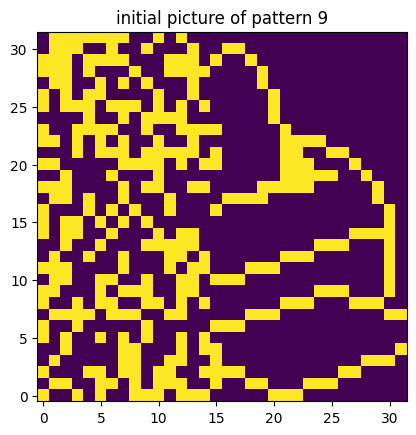

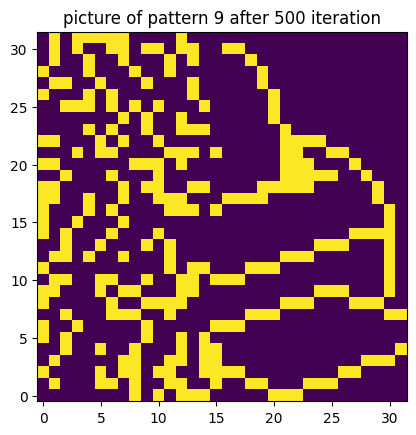

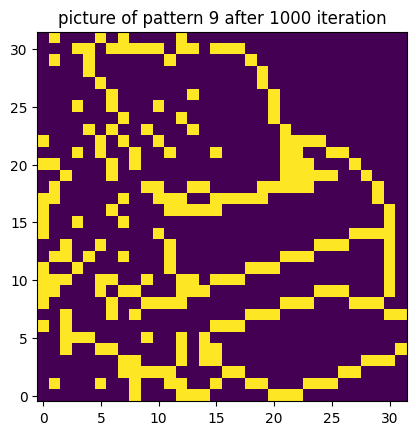

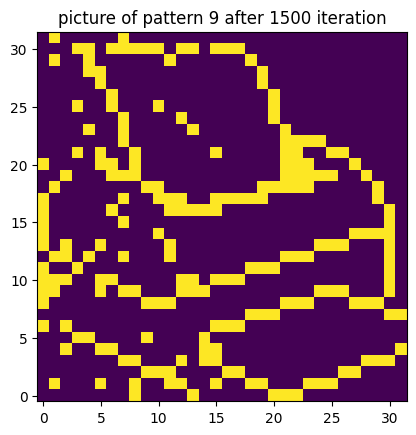

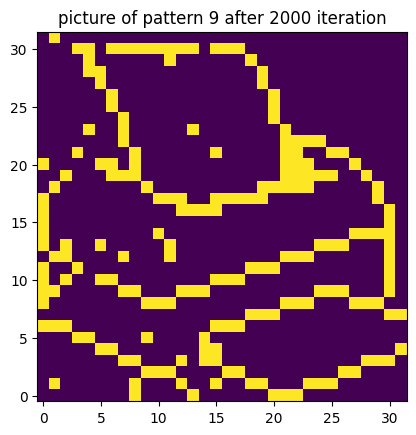

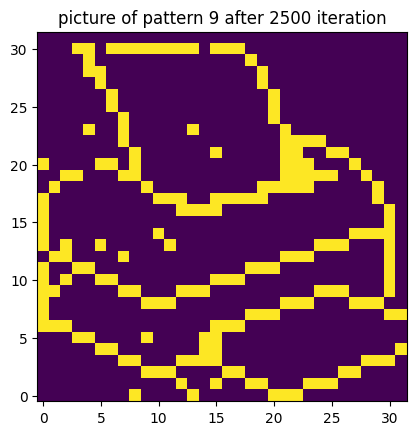

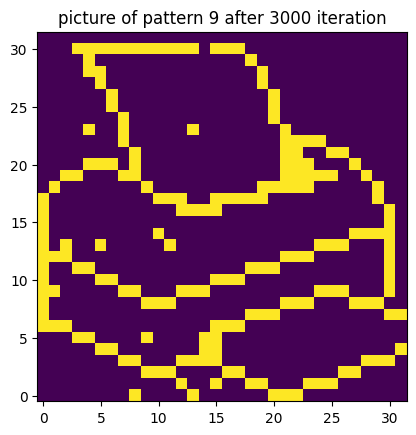

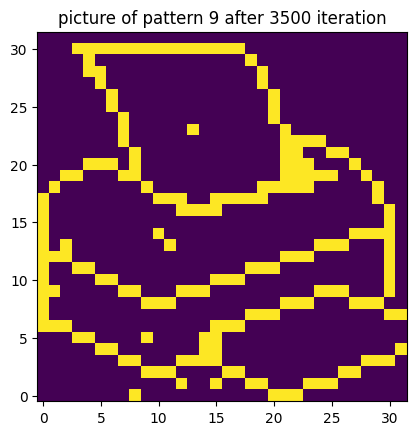

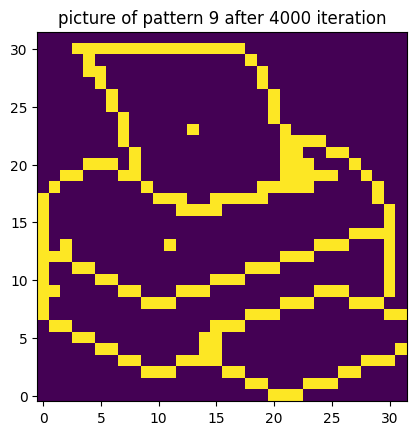

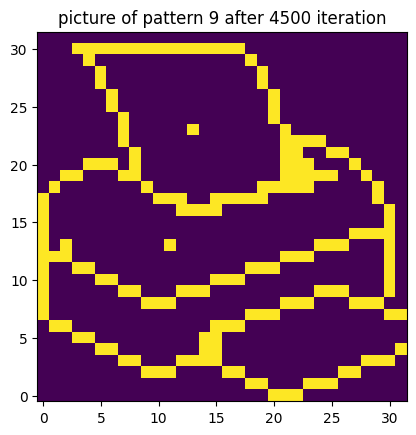

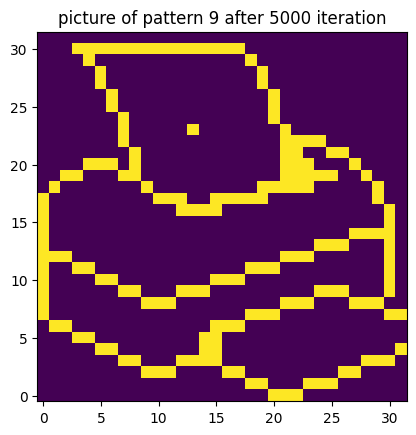

In [8]:
max_iteration = 5000
nb_image_desired = 10
clic = max_iteration/nb_image_desired
display(data[9], "initial picture of pattern 9")
_, _ = training_at_random(weight, distorted_p1, max_iteration, clic, True)

3.3 Energy

What is the energy at the different attractors ? -> The Energy is minimal and maybe null..?

What is the energy at the points of the distorted patterns? -> The energy is maximum ...?

Truc important à savoir pour cette partie :

- On calcule l'énergie
- On regarde quand elle se stabilise mais c'est chaud parce que ça oscille un peu en local
- On regarde ce que ça fait de distribuer les poids avec une lois normale centrée
- Enfin on regarde ce que ça fait de rendre symétrique la matrice de poids

In [9]:
# We keep the same training function but we add the energy computation
# Je renomme la fonction mais c'est le même procédé de learning
import matplotlib.pyplot as plt


def energy(pattern, w, check = False , energy_old = None, cv_NRJ = None):
    new_energy = np.sum(-np.dot(pattern, np.dot(w, pattern.T)))
    if not check:
        return new_energy
    else :
        if new_energy == energy_old :
            cv_NRJ += 1
        else:
            cv_NRJ = 0
        return(new_energy)

def sequential_training(weight,pattern, max_iteration=100, clic=10, displaying = False):
    W = weight.copy()
    X = pattern.copy()
    energy_old = energy(X, W)
    cv_NRJ = 0
    count = 0
    energy_list = [energy_old]
    while (count <= max_iteration):
        for i in range(X.shape[0]):
            idx = np.random.randint(0, X.shape[1])
            X[i, idx] = np.where((X[i, :] @ W[idx]) >= 0, 1, -1) #Update rule with randomness
        count+=1
        if displaying and count%clic == 0:
            display(X, "picture of pattern 10 after "+str(count)+" iteration")
        energy_new = energy(X, W, True, energy_old, cv_NRJ)
        energy_list.append(energy_new)
        energy_old = energy_new
        if cv_NRJ  > 3 :
            break

    return X, energy_list

import random

def compute_weights_normal(X, symmetrisize=False):
    n = X.shape[0]  # patterns
    m = X.shape[1]  # neurons
    W = 0
    outer_products = [np.array([np.outer(X[i], X[i])]) for i in range(n)]
    for i in range(len(outer_products)):
        W += outer_products[i]
    weight = W[0, :, :]
    for i in range(m):
        for j in range(m):
            weight[i, j] = random.normalvariate(0, 1) #la variance est peu être un peu grande, peut être qu'il faudra en étudier l'effet
    if symmetrisize:
        weight = 0.5 * (weight + weight.T)
    return(weight)

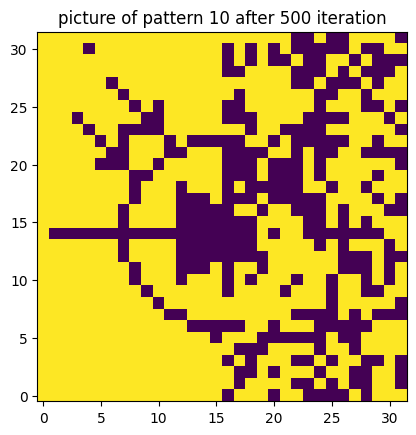

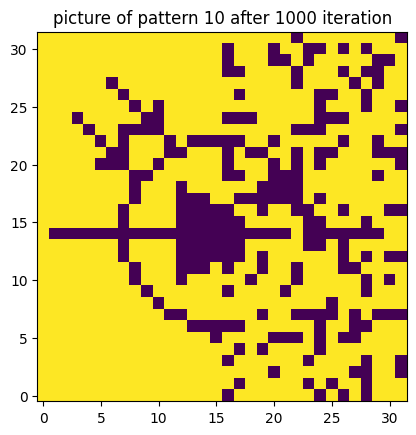

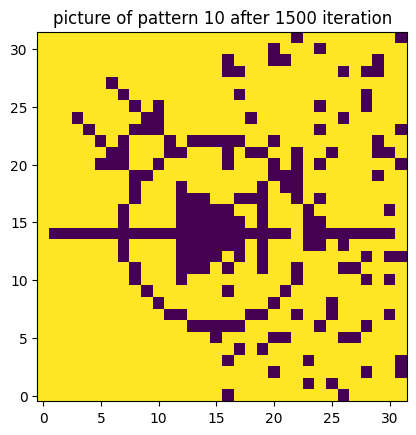

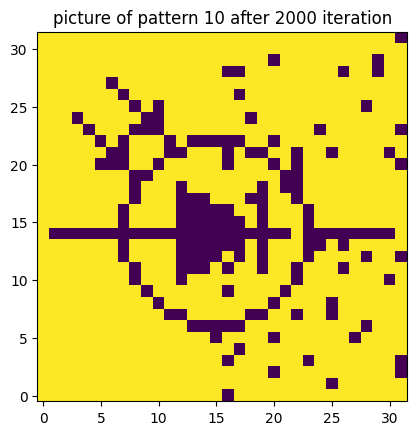

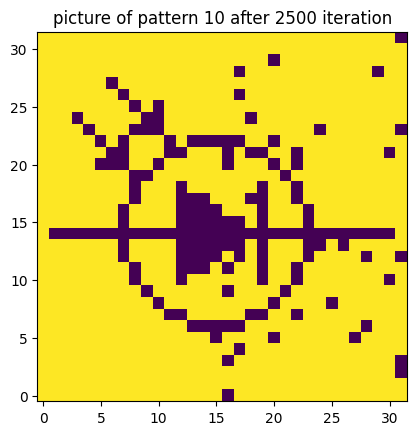

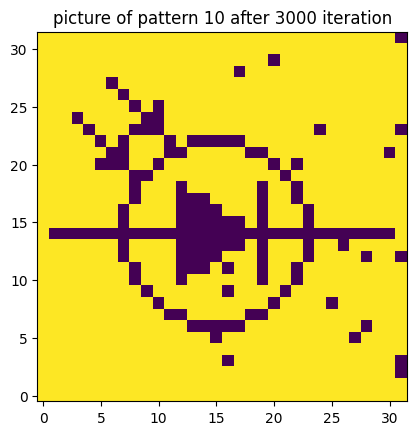

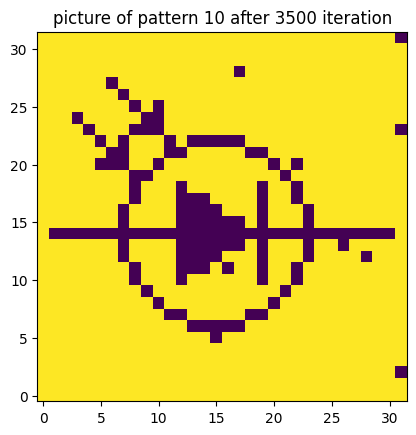

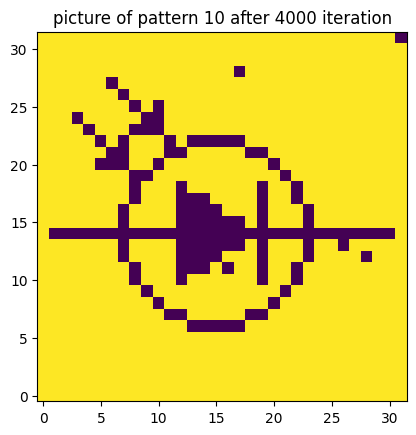

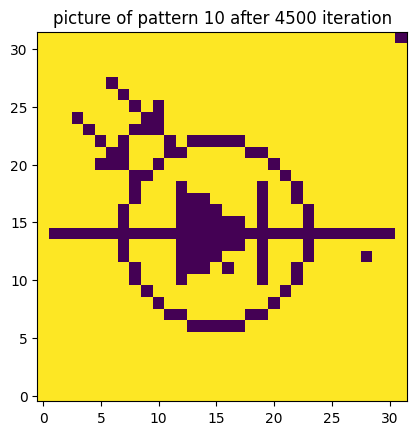

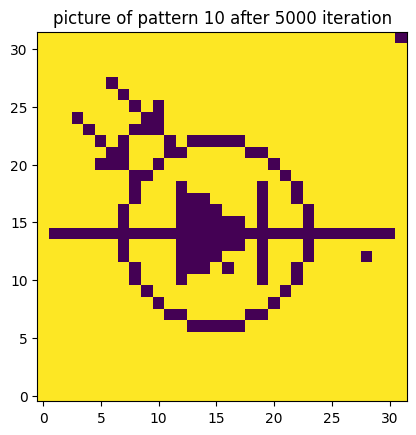

Text(0.5, 1.0, 'Energy evolution over iterations')

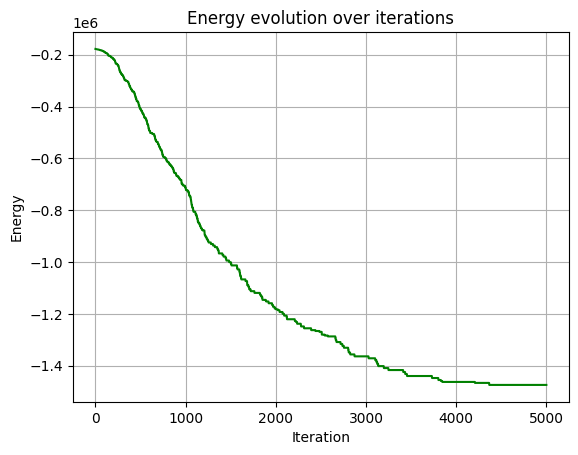

In [10]:
# Test with computation of weights like before
patterns = data[:3, :].copy()
weight = compute_weights(patterns)
distorted_p2_p3 = data[10:11, :].copy()

max_iteration = 5000
nb_image_desired = 10
clic = max_iteration/nb_image_desired
_, energy_list_classic = sequential_training(weight, distorted_p2_p3, max_iteration,clic,True)


plt.figure(1)
plt.plot(np.arange(len(energy_list_classic)),energy_list_classic,'green')
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.title("Energy evolution over iterations")

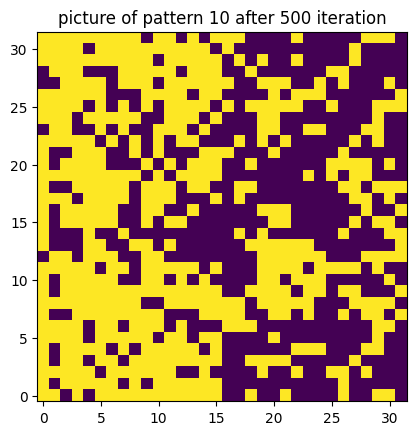

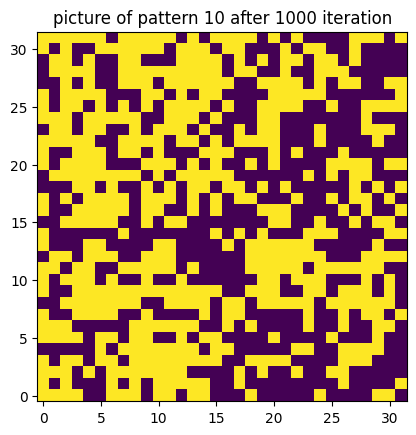

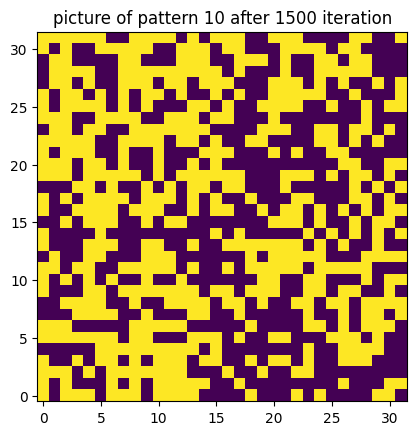

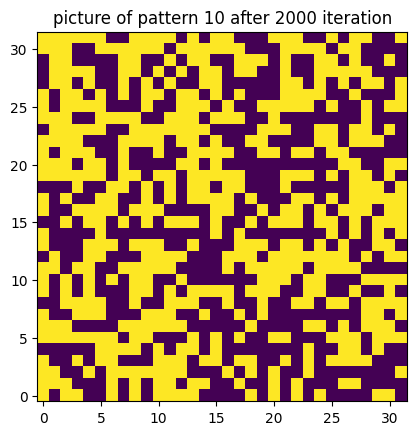

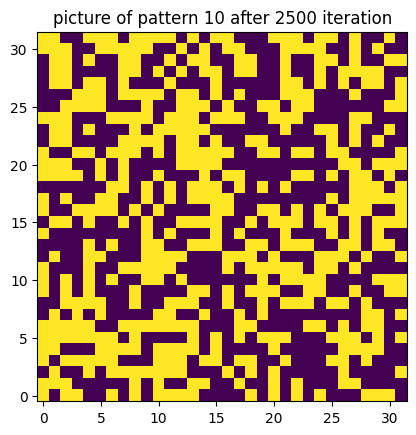

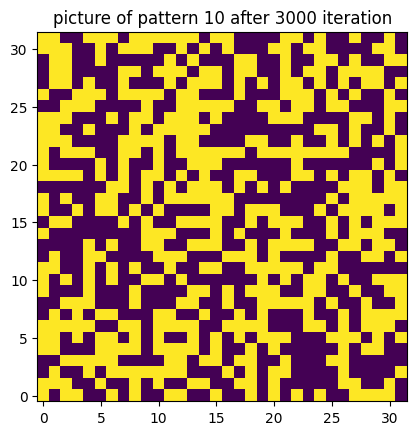

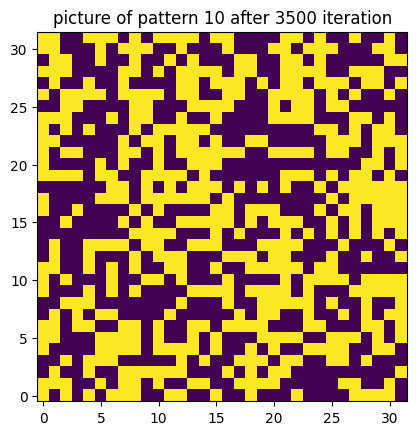

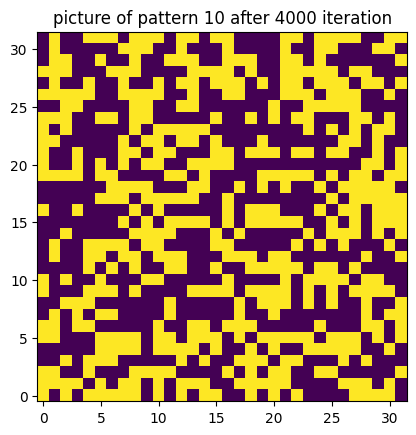

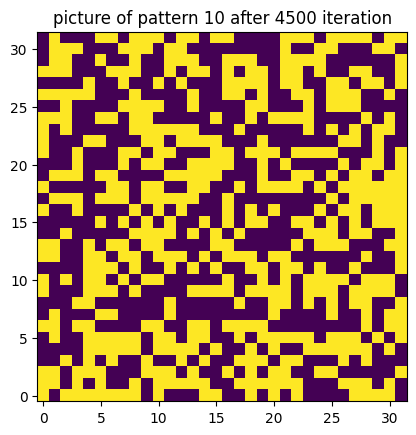

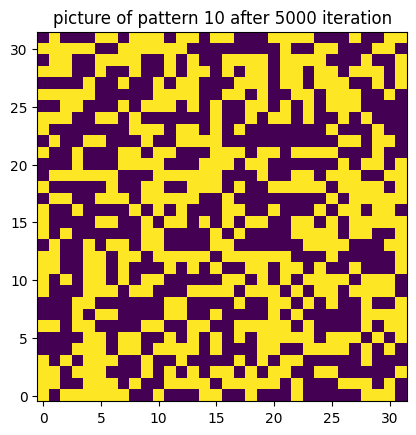

Text(0.5, 1.0, 'Energy evolution over iterations')

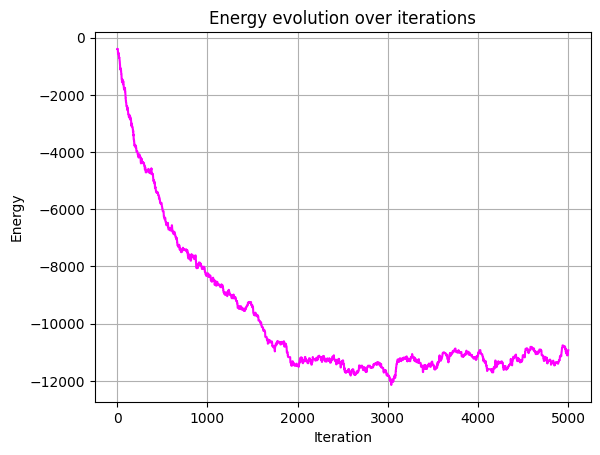

In [11]:
# Test with computation of normal-distributed weights
patterns = data[:3, :].copy()
weight_normal = compute_weights_normal(patterns)
distorted_p2_p3 = data[10:11, :].copy()

max_iteration = 5000
nb_image_desired = 10
clic = max_iteration/nb_image_desired
_, energy_list_normal = sequential_training(weight_normal, distorted_p2_p3, max_iteration,clic,True)


plt.figure(2)
plt.plot(np.arange(len(energy_list_normal)),energy_list_normal,'magenta')
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.title("Energy evolution over iterations")

Text(0.5, 1.0, 'Energy evolution over iterations')

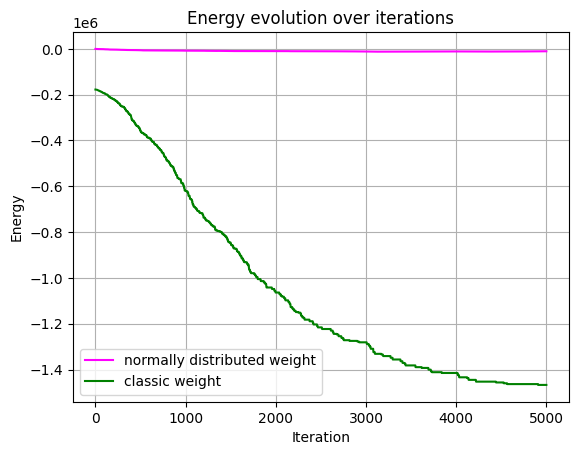

In [12]:
_, energy_list_classic = sequential_training(weight, distorted_p2_p3, max_iteration)
_, energy_list_normal = sequential_training(weight_normal, distorted_p2_p3, max_iteration)

plt.figure(3)
plt.plot(np.arange(len(energy_list_normal)),energy_list_normal,'magenta',label='normally distributed weight')
plt.plot(np.arange(len(energy_list_classic)),energy_list_classic,'green',label='classic weight')
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.title("Energy evolution over iterations")

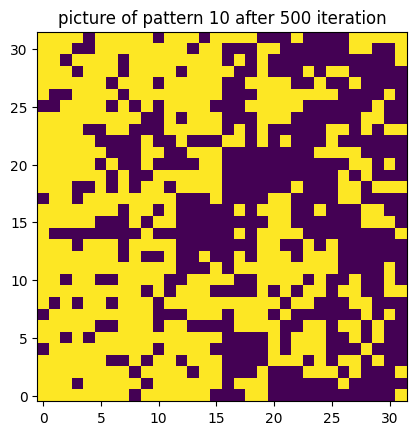

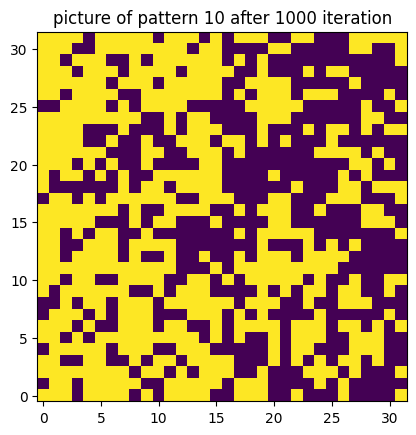

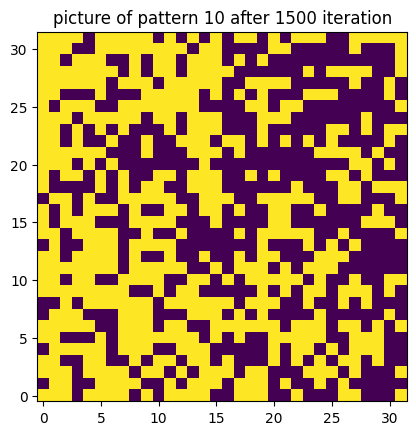

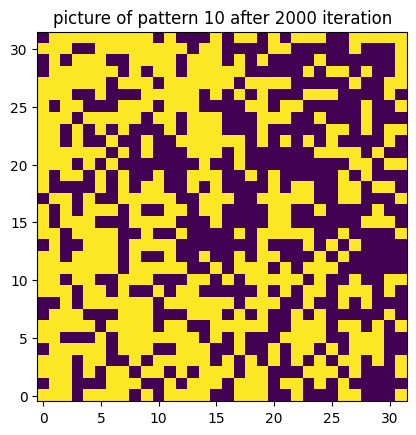

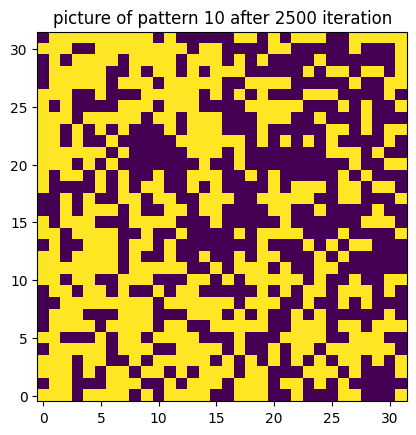

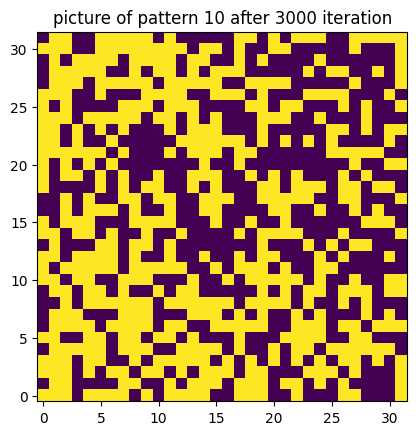

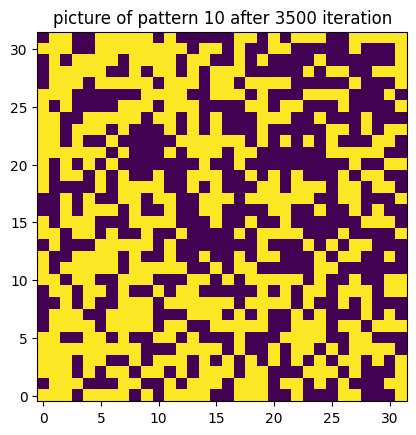

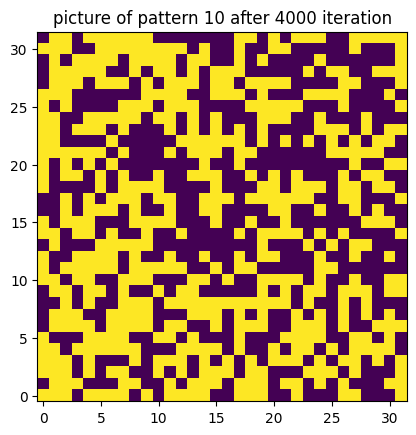

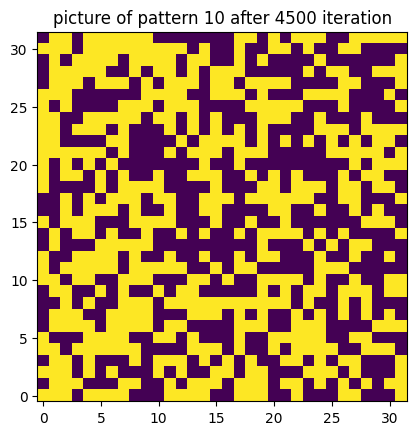

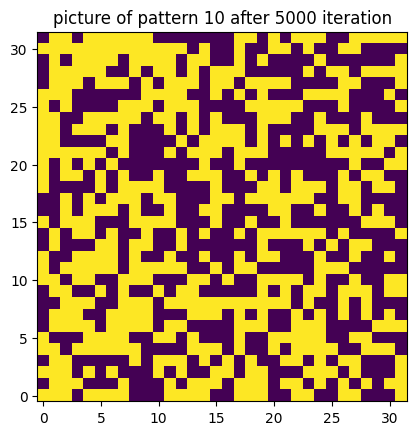

Text(0.5, 1.0, 'Energy evolution over iterations')

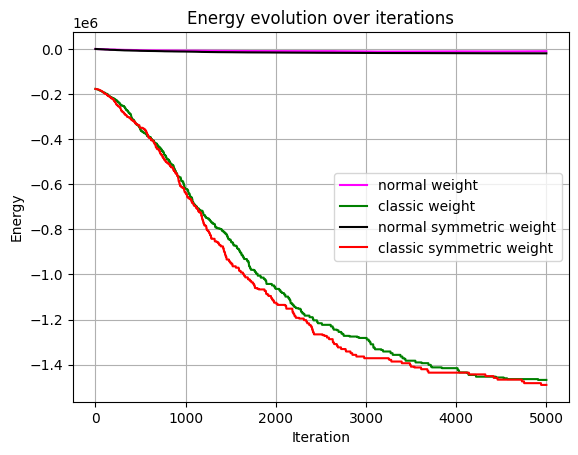

In [13]:
# effect of putting the weight matrix symmetric

weight_normal_symmetric = compute_weights_normal(patterns,True)
weight_classic_symmetric = compute_weights(patterns)
weight_classic_symmetric = 0.5*(weight_classic_symmetric.T + weight_classic_symmetric)

_, energy_list_classic_symmetric = sequential_training(weight_classic_symmetric, distorted_p2_p3, max_iteration)
_, energy_list_normal_symmetric = sequential_training(weight_normal_symmetric, distorted_p2_p3, max_iteration, clic, True)

plt.figure(4)
plt.plot(np.arange(len(energy_list_normal)),energy_list_normal,'magenta',label='normal weight')
plt.plot(np.arange(len(energy_list_classic)),energy_list_classic,'green',label='classic weight')
plt.plot(np.arange(len(energy_list_normal_symmetric)),energy_list_normal_symmetric,'black',label='normal symmetric weight')
plt.plot(np.arange(len(energy_list_classic_symmetric)),energy_list_classic_symmetric,'red',label='classic symmetric weight')
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.title("Energy evolution over iterations")

3.4 Distorsion resistance

- About 40% noise can be removed
- For noise > 60%, it usually converges towards the same pattern with its pixels flipped
- There are several attractors: the pattern, the pattern flipped, other paterns and a mixture of the 3 patterns 

In [116]:
random.randint(0,10)

8

In [14]:
# Flipping the data

data = np.loadtxt('pict.dat', delimiter=",", dtype=int).reshape(-1, 1024)

patterns = data[:3, :].copy()
weight = compute_weights(patterns)




def flipping2(data, flipping_rate):
    the_data = data.copy()
    random.seed(98)
    longueur = len(data)
    nb_flipping = int(np.floor(flipping_rate*longueur/2))
    for i in range(nb_flipping):
        nb1 = random.randint(0,np.floor(longueur/2))
        nb2 = random.randint(0,np.floor(longueur/2))
        the_data[nb1] = data[longueur - nb2]
        the_data[longueur - nb2] = data[nb1]
    return the_data


def flipping(data, flipping_rate):
    the_data = data.copy()
    random.seed(95)
    longueur = len(data)
    nb_flipping = int(np.floor(flipping_rate*longueur))
    flipps = list(range(longueur))
    for i in range(nb_flipping):
        nb1 = random.randint(0,longueur-1)
        the_data[flipps[nb1]] = -the_data[flipps[nb1]]
        del flipps[nb1]
        longueur = longueur - 1

    return the_data


Noise = 0.1
[0.0]


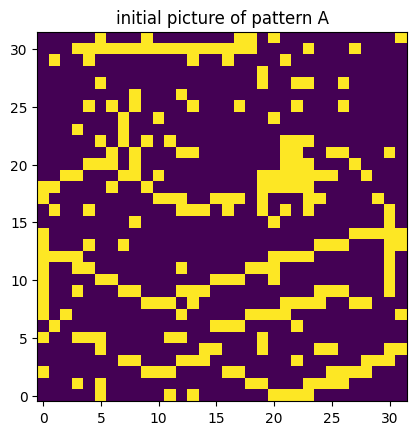

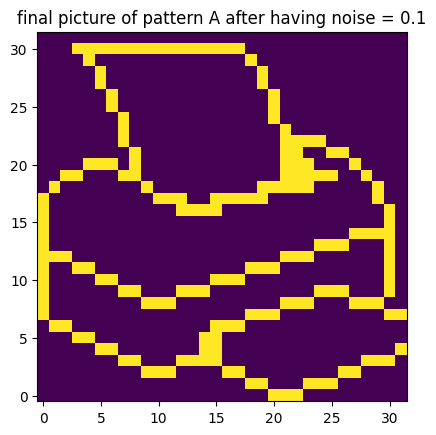

Noise = 0.2
[0.0, 0.0]


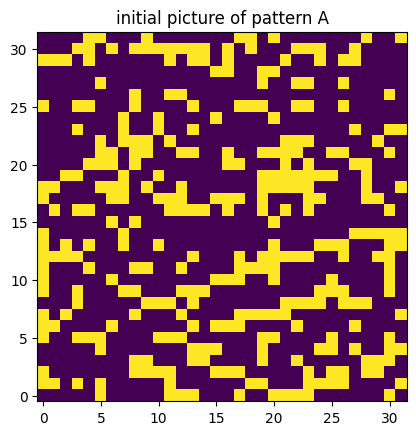

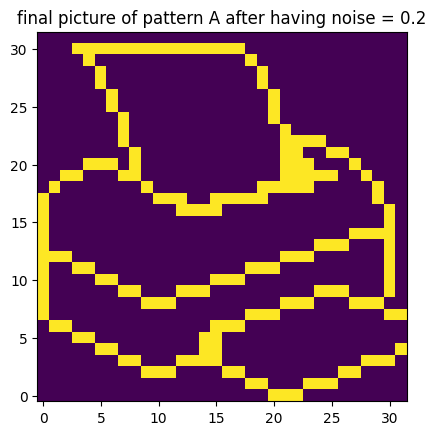

Noise = 0.3
[0.0, 0.0, 0.0]


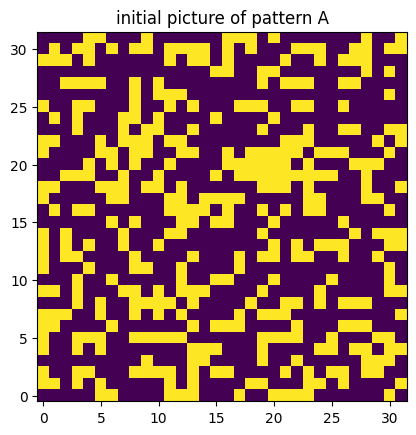

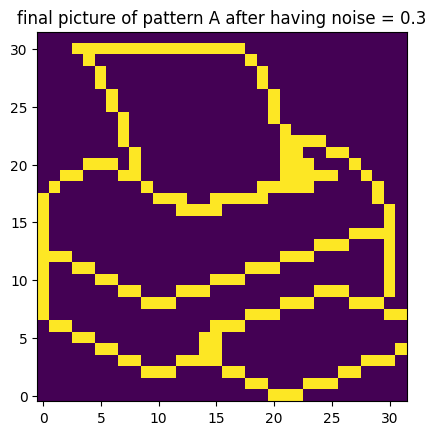

Noise = 0.4
[0.0, 0.0, 0.0, 0.0]


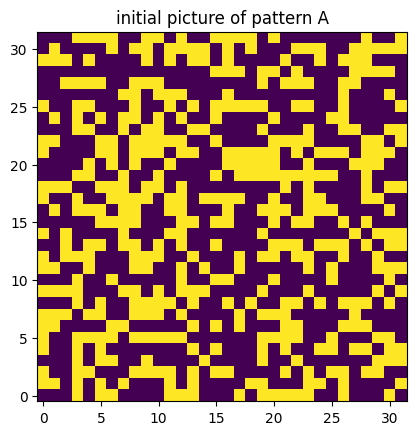

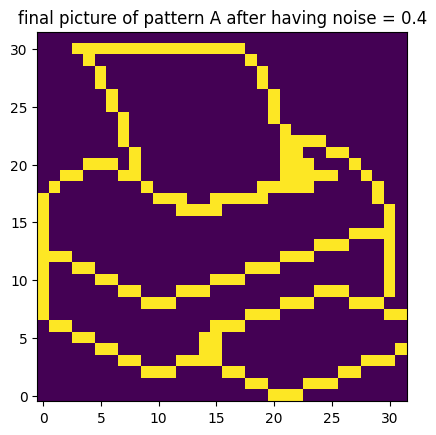

Noise = 0.45
[0.0, 0.0, 0.0, 0.0, 0.0]


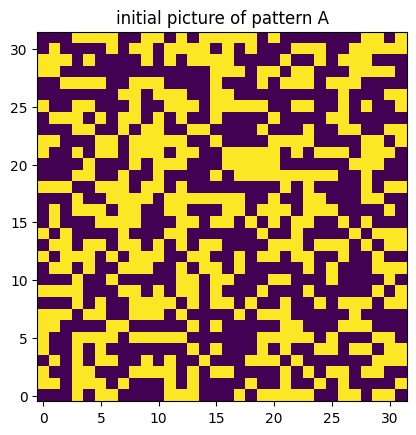

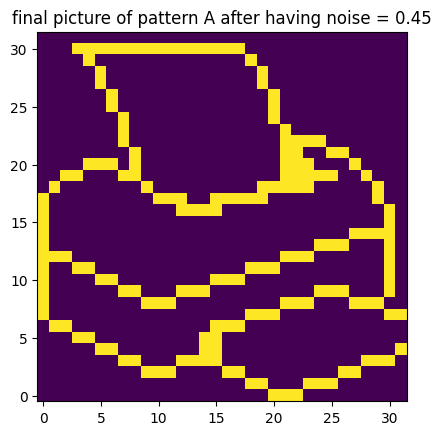

Noise = 0.5
[0.0, 0.0, 0.0, 0.0, 0.0, 0.75]


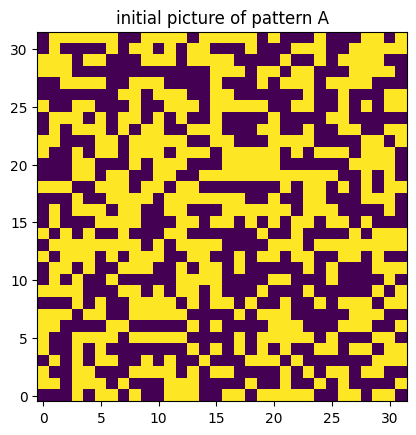

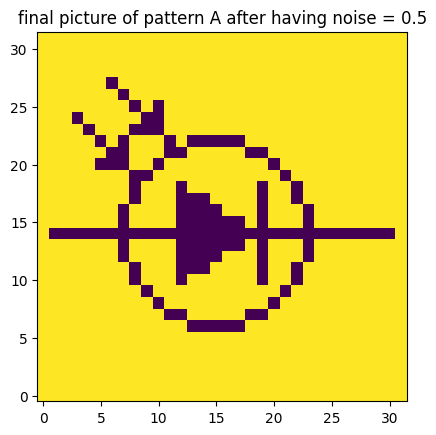

Noise = 0.55
[0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 1.0]


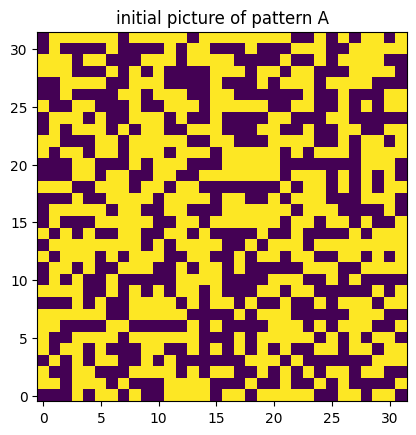

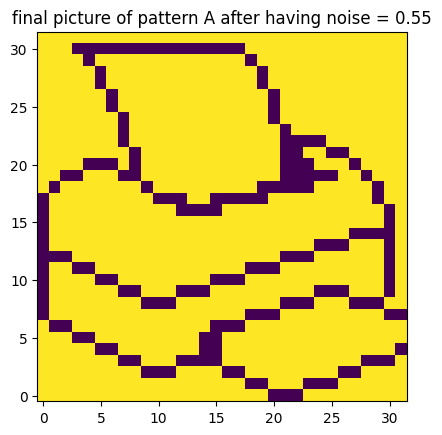

Noise = 0.6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 1.0, 1.0]


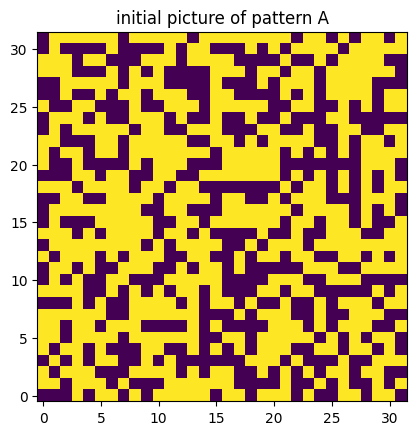

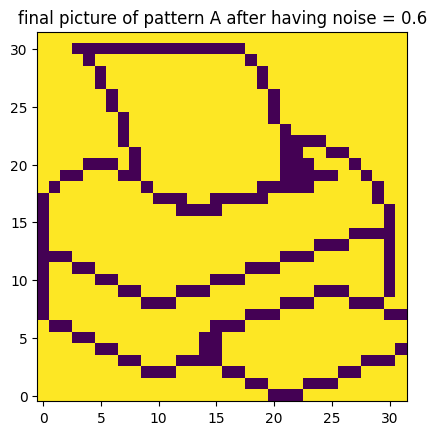

Noise = 0.65
[0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 1.0, 1.0, 1.0]


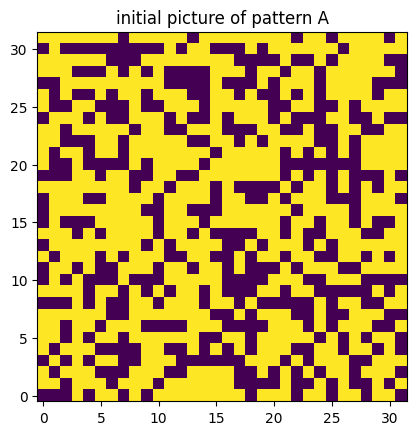

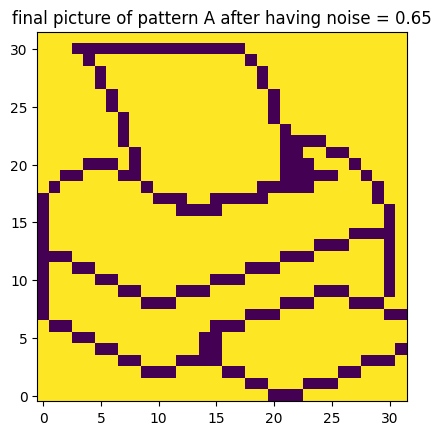

Noise = 0.7
[0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 1.0, 1.0, 1.0, 1.0]


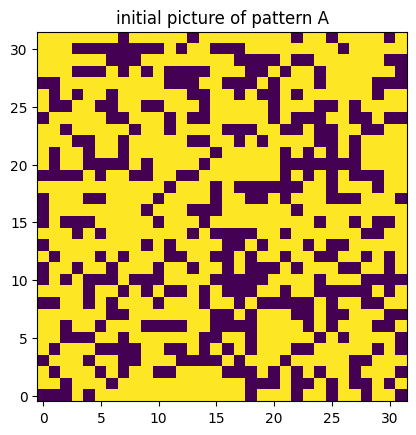

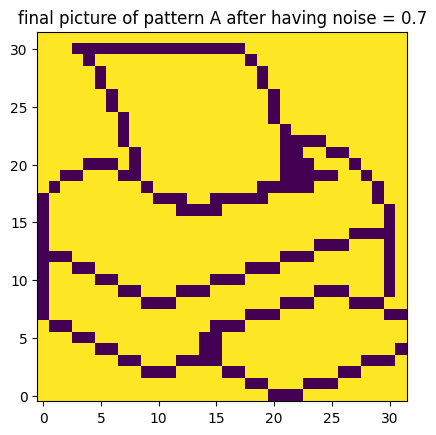

Noise = 0.75
[0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0]


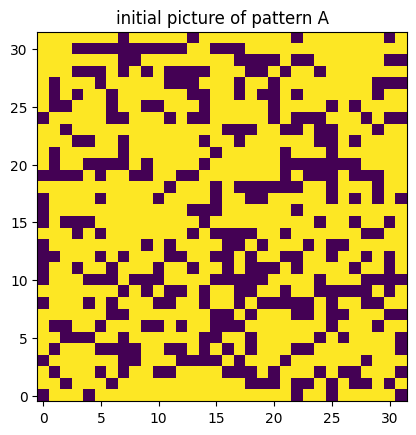

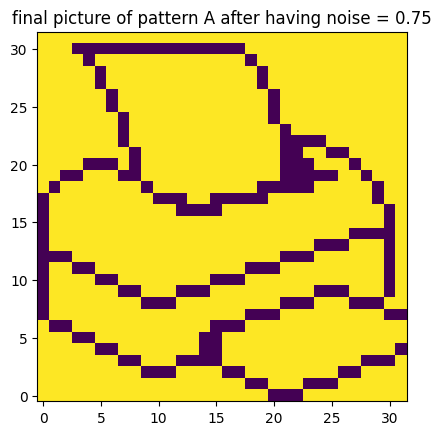

Noise = 0.8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


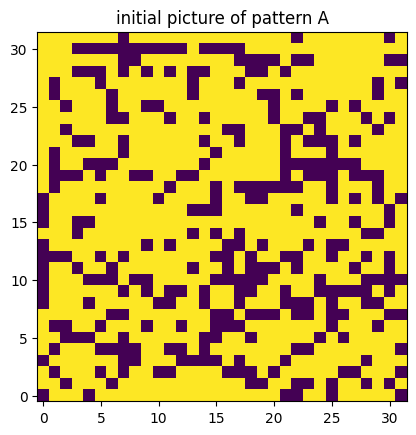

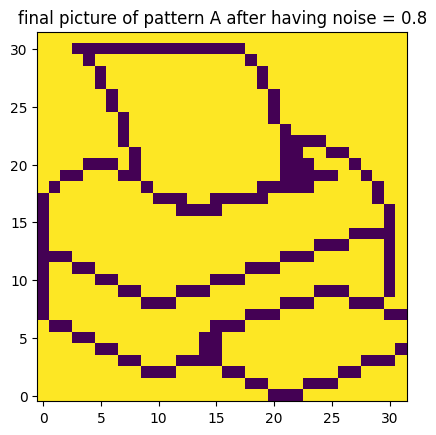

Noise = 0.9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


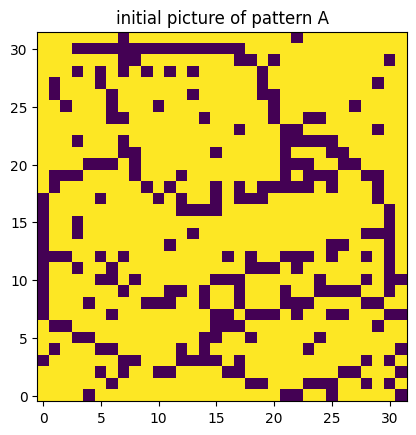

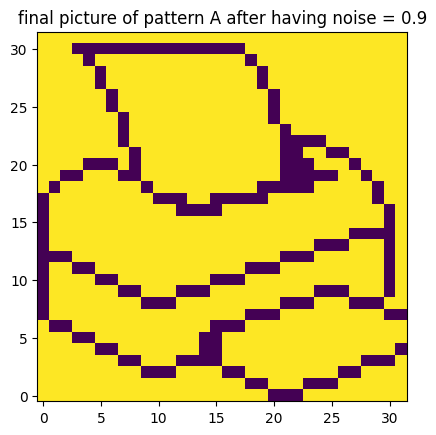

Noise = 1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


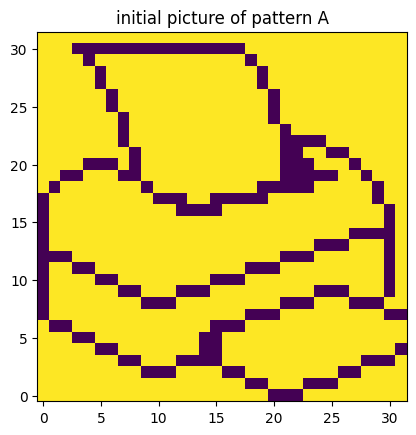

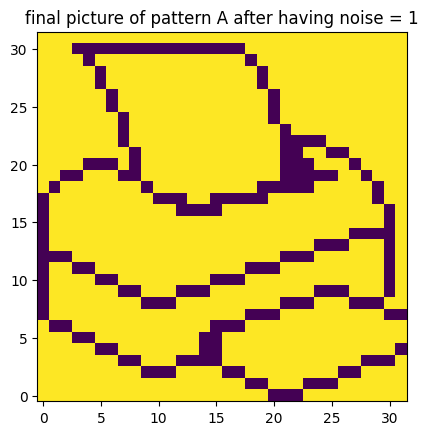

AttributeError: 'Text' object has no property 'Fontsize'

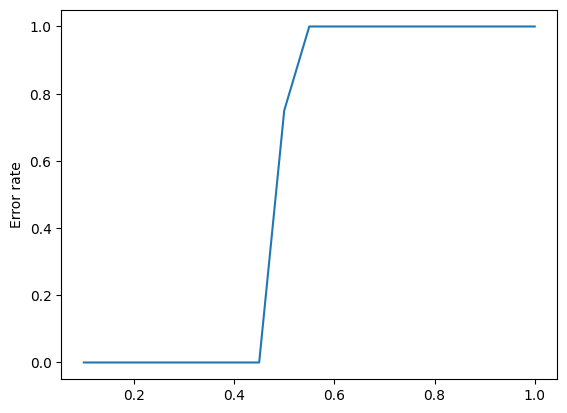

In [15]:
# pattern 1

max_iteration = 5000
the_flipping_rates = [0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.9,1]
data1_initial = patterns[0]
error = []
for elt in the_flipping_rates:
    data1 = flipping(patterns[0],elt)
    print("Noise = " + str(elt))
    X, _ = training(weight, np.array([data1]), max_iteration)
    vect = data1_initial - X
    error.append(np.mean(np.where(vect == 0, 0, 1)))
    print(error)
    display(np.array([data1]), "initial picture of pattern A")
    display(X, "final picture of pattern A after having noise = " + str(round(elt,2)))

plt.plot(the_flipping_rates, error)
plt.ylabel('Error rate', Fontsize = 14)
plt.grid()
plt.xlabel('Noise rate', Fontsize = 14)


Noise = 0.1


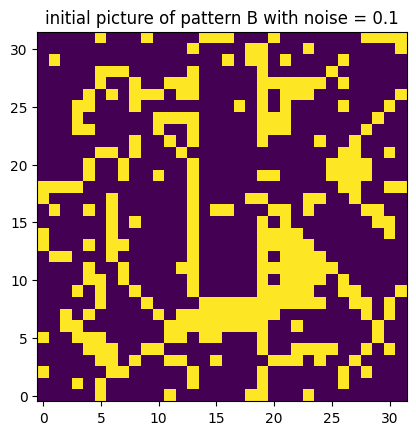

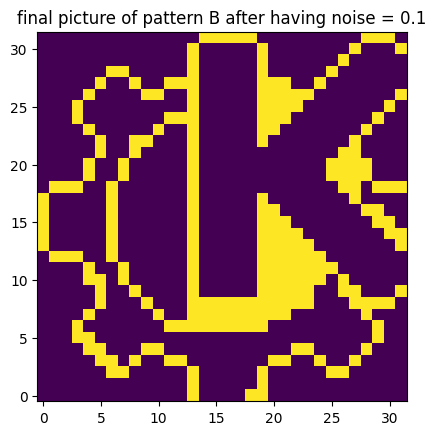

Noise = 0.2


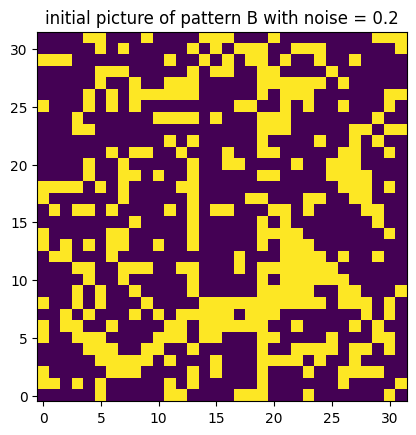

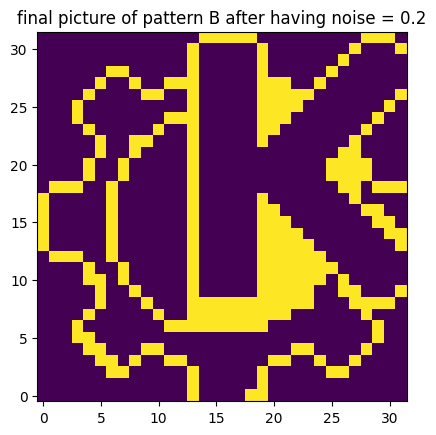

Noise = 0.3


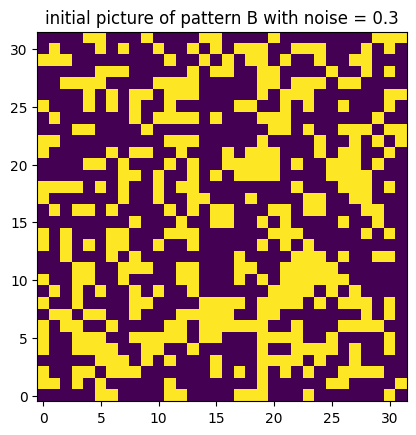

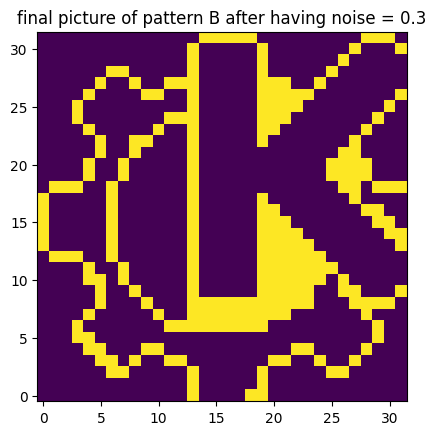

Noise = 0.4


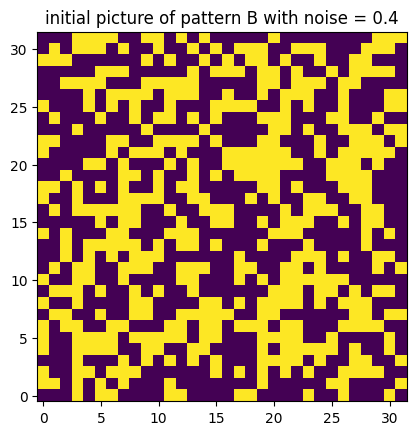

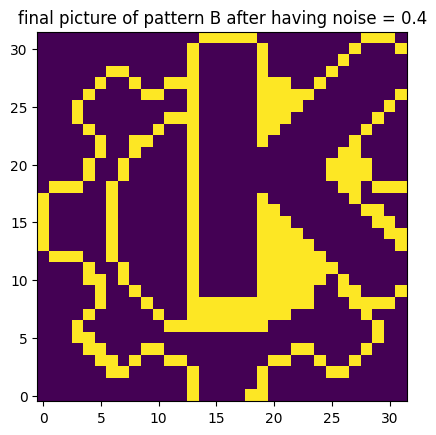

Noise = 0.45


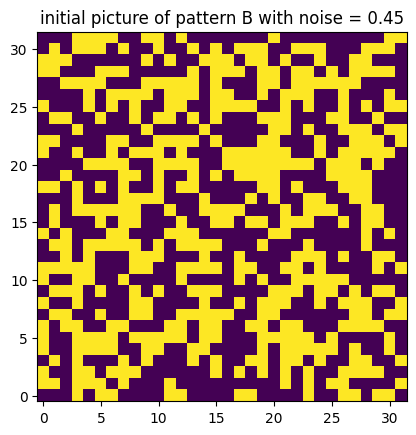

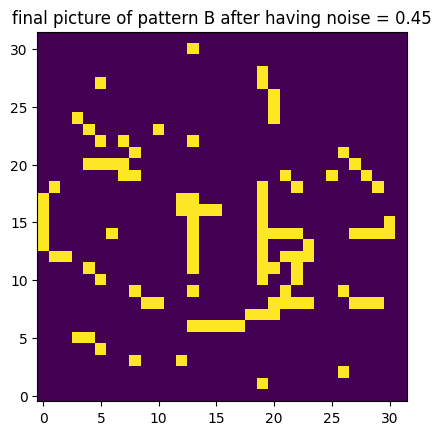

Noise = 0.5


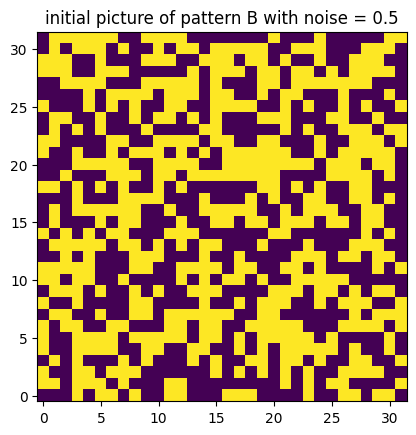

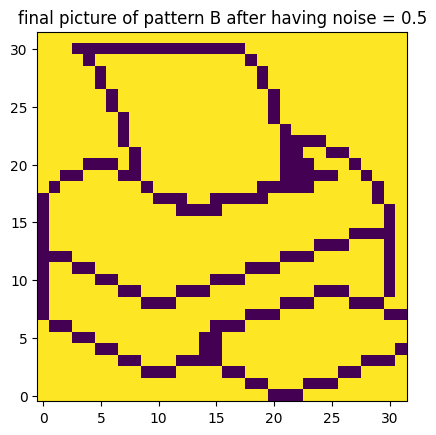

Noise = 0.55


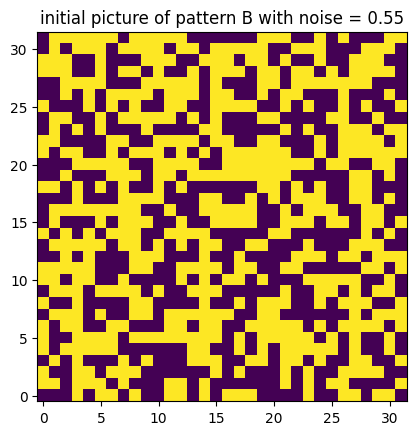

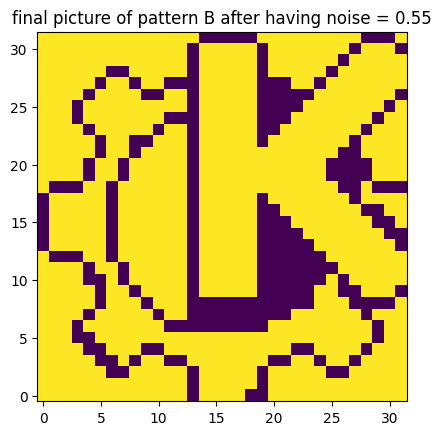

Noise = 0.6


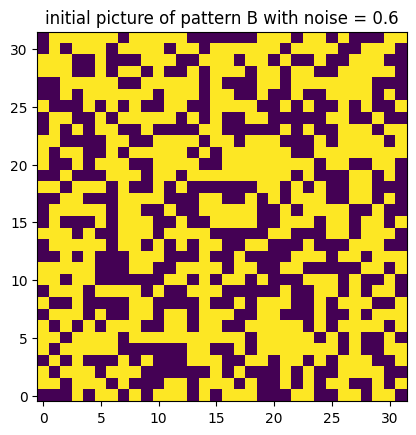

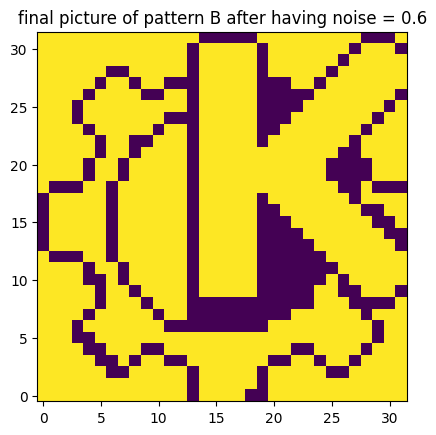

Noise = 0.65


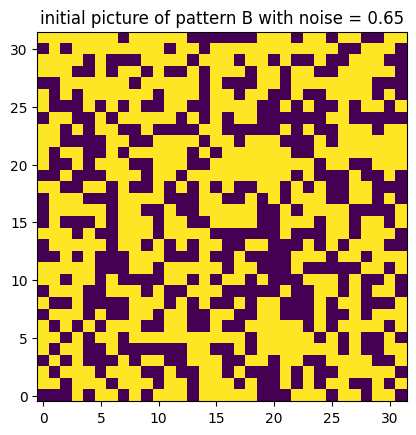

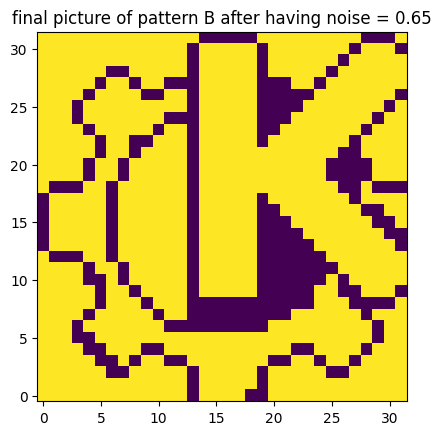

Noise = 0.7


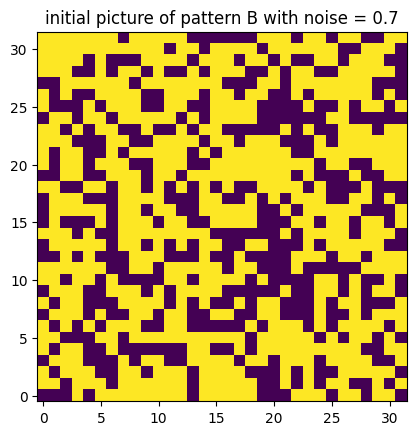

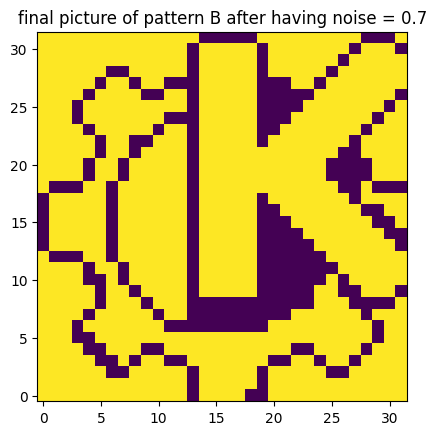

Noise = 0.75


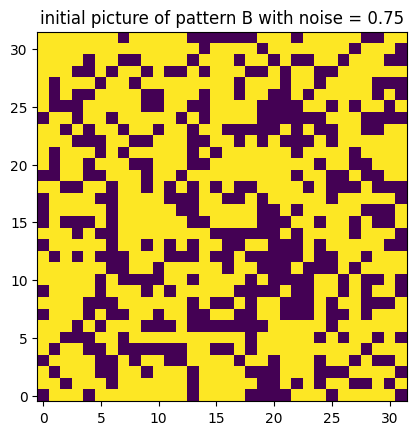

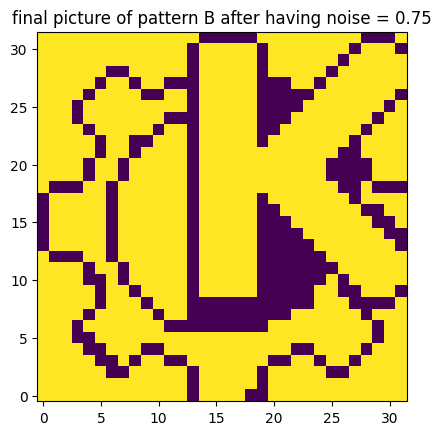

Noise = 0.8


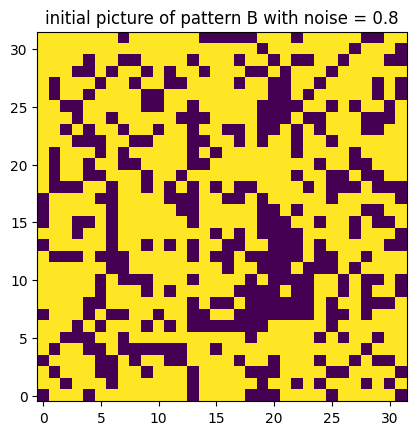

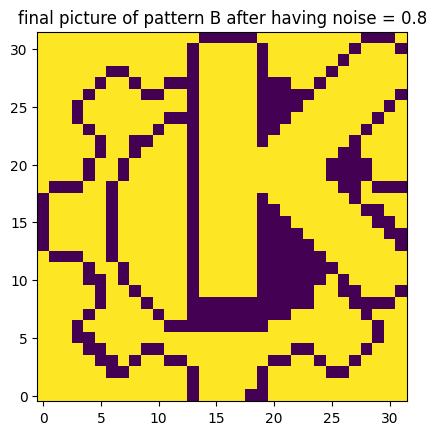

Noise = 0.9


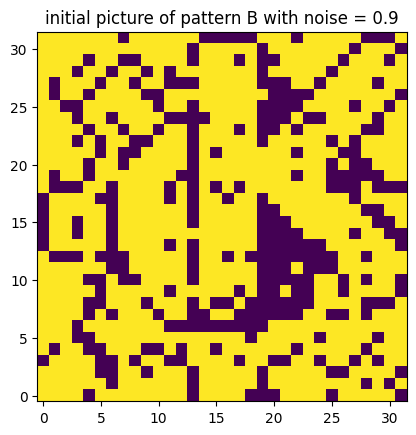

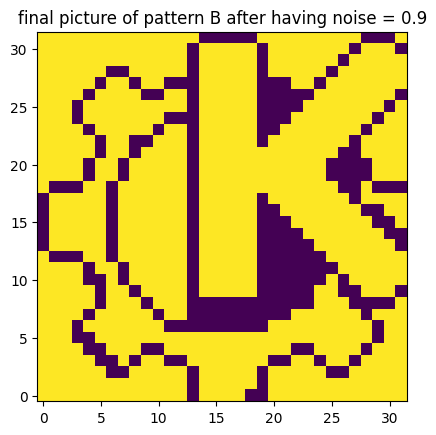

Noise = 1


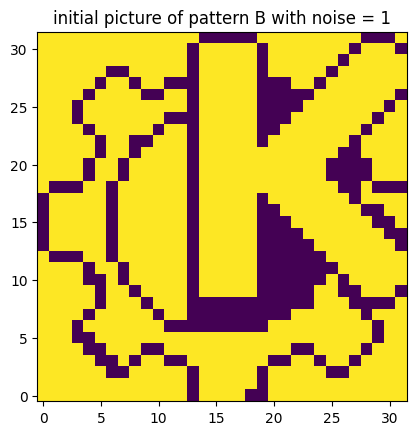

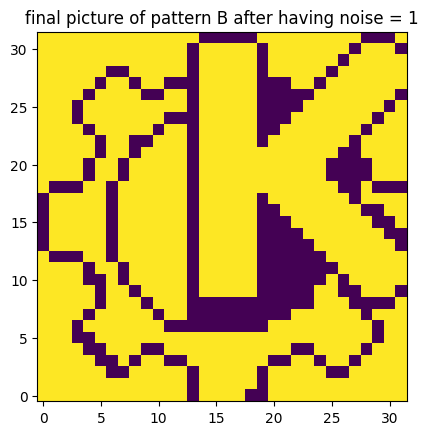

AttributeError: 'Text' object has no property 'Fontsize'

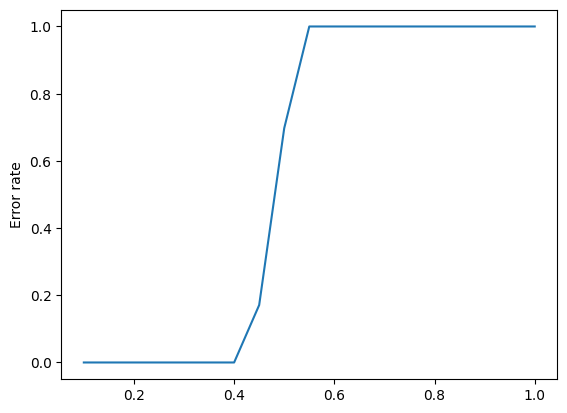

In [16]:
# pattern 2

max_iteration = 5000
the_flipping_rates = [0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.9,1]
data2_initial = patterns[1]
error = []
for elt in the_flipping_rates:
    data2 = flipping(patterns[1],elt)
    print("Noise = " + str(elt))
    X, _ = training(weight, np.array([data2]), max_iteration)
    vect = data2_initial - X
    error.append(np.mean(np.where(vect == 0, 0, 1)))
    display(np.array([data2]), "initial picture of pattern B with noise = "+ str(round(elt,2)))
    display(X, "final picture of pattern B after having noise = " + str(round(elt,2)))

plt.plot(the_flipping_rates, error)
plt.ylabel('Error rate', Fontsize = 14)
plt.grid()
plt.xlabel('Noise rate', Fontsize = 14)

Noise = 0.01


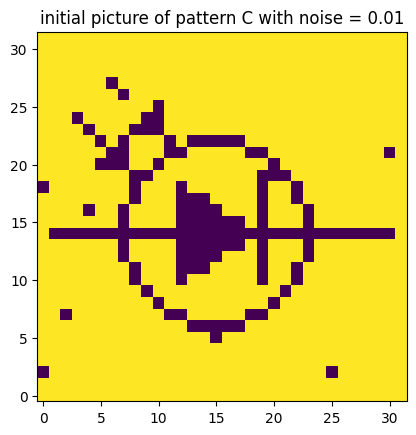

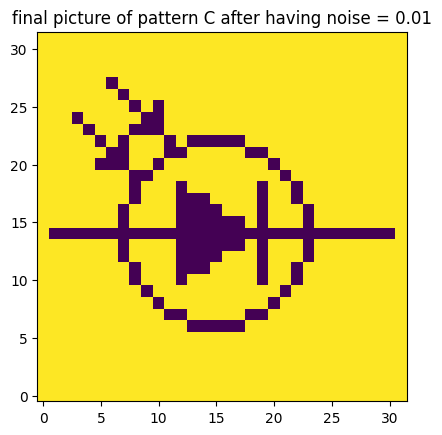

Noise = 0.2


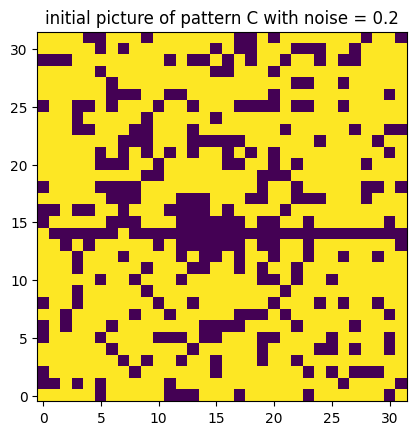

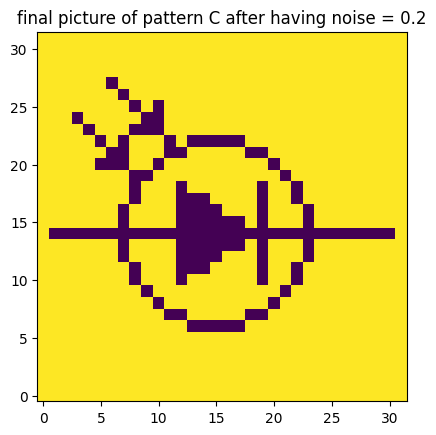

Noise = 0.3


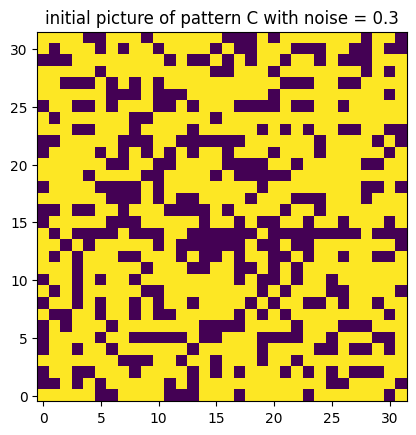

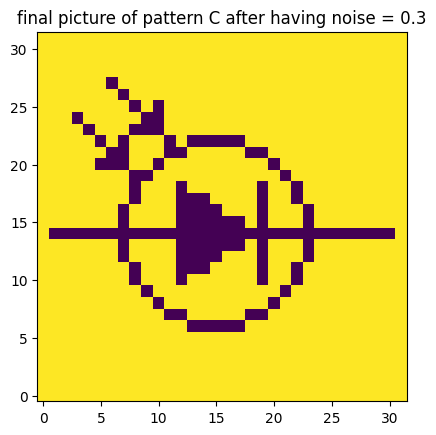

Noise = 0.4


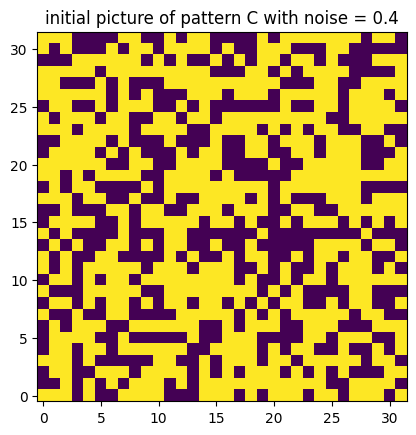

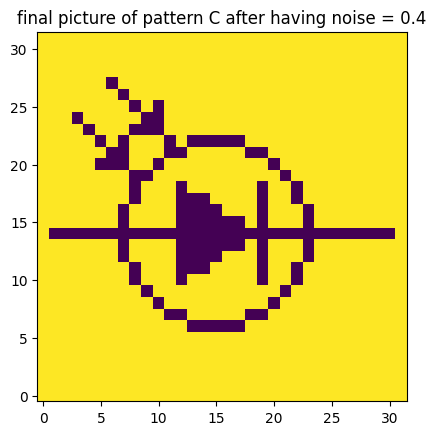

Noise = 0.45


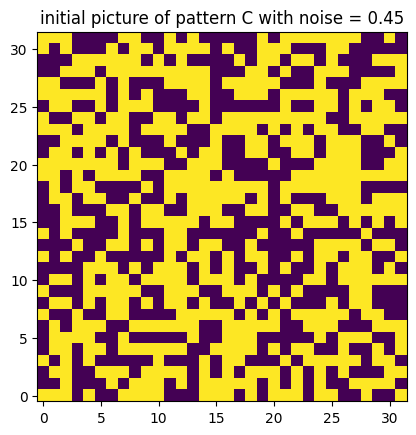

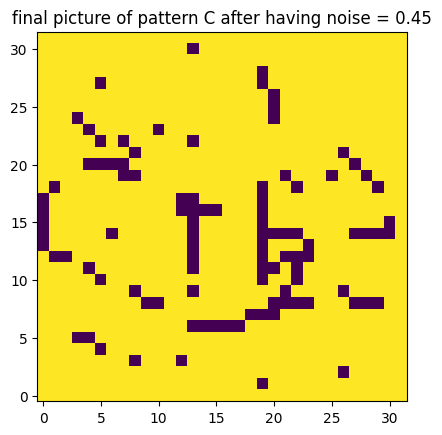

Noise = 0.5


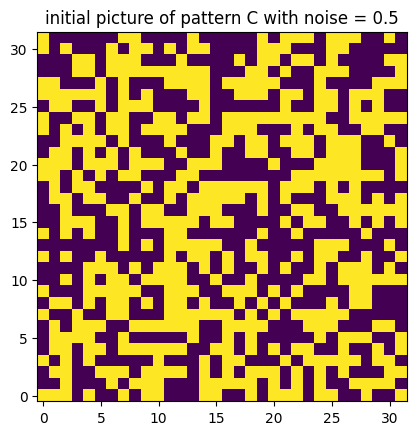

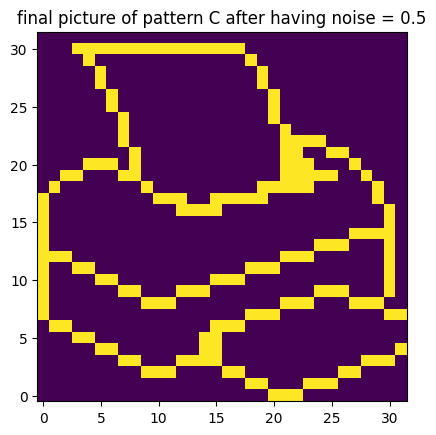

Noise = 0.55


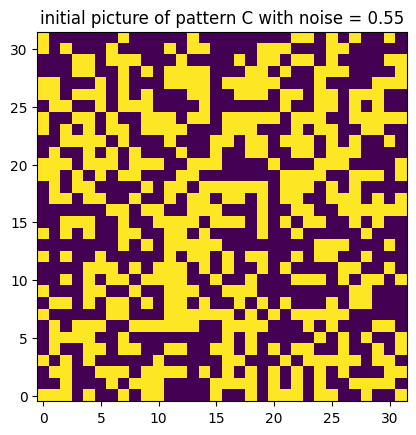

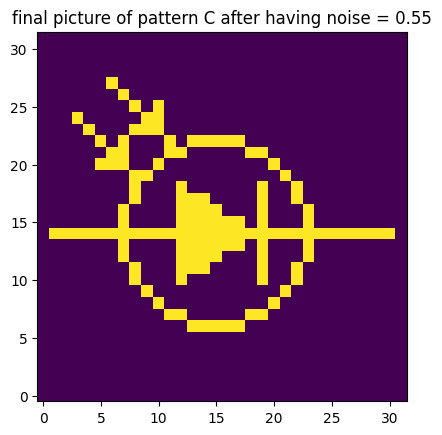

Noise = 0.6


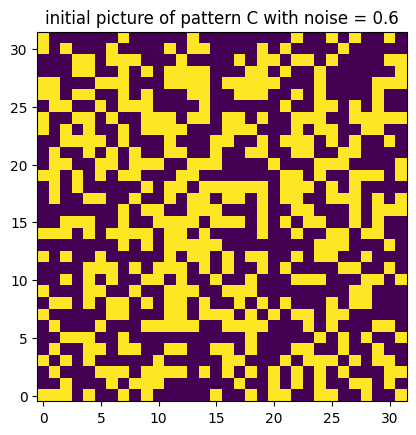

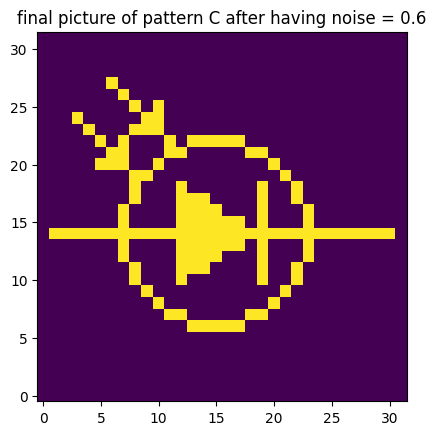

Noise = 0.65


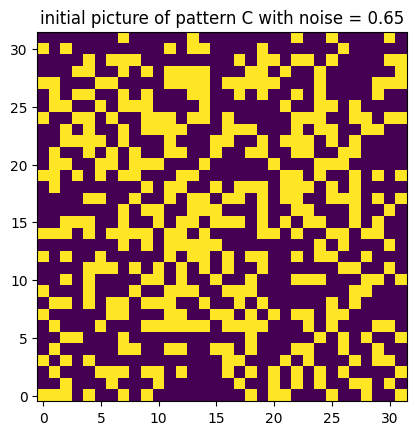

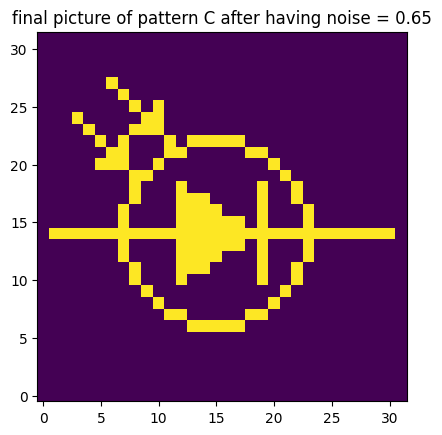

Noise = 0.7


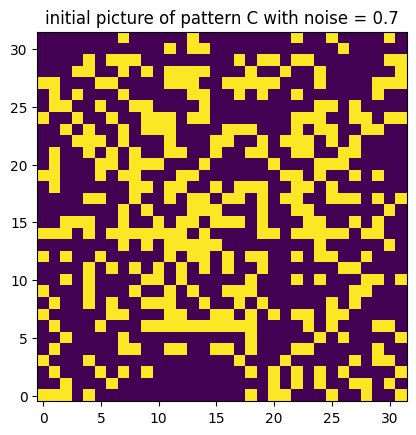

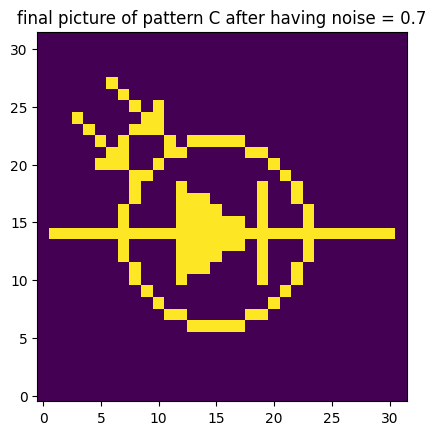

Noise = 0.75


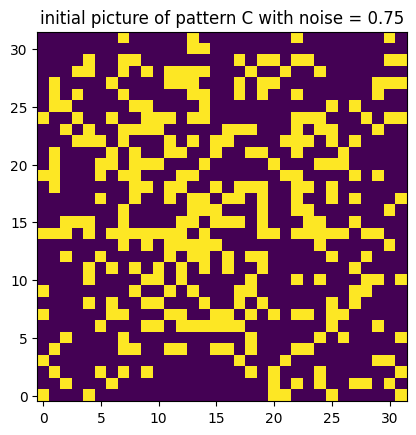

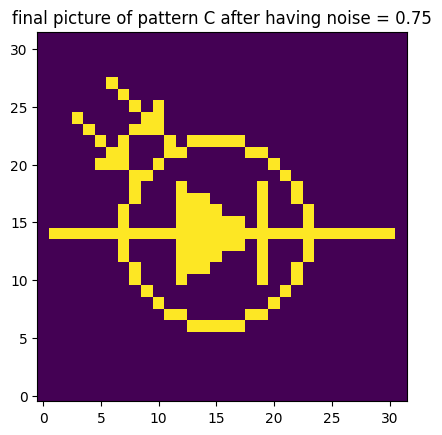

Noise = 0.8


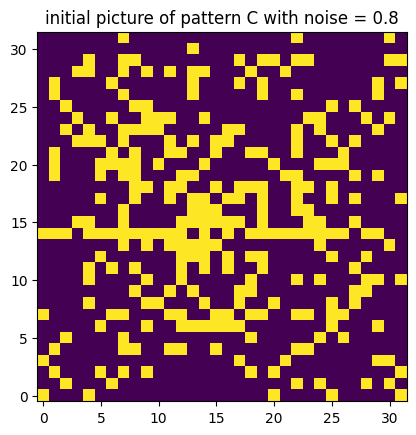

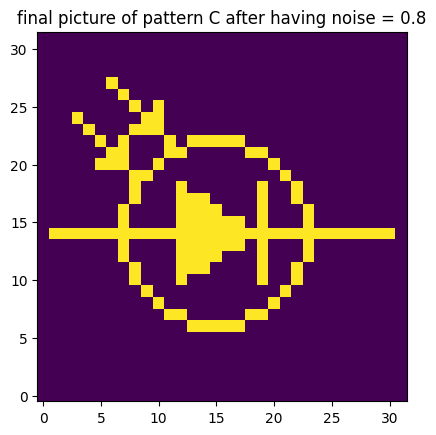

Noise = 0.9


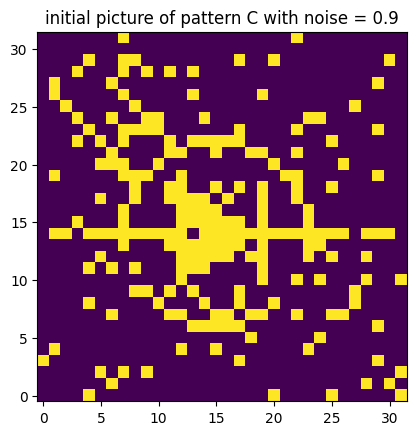

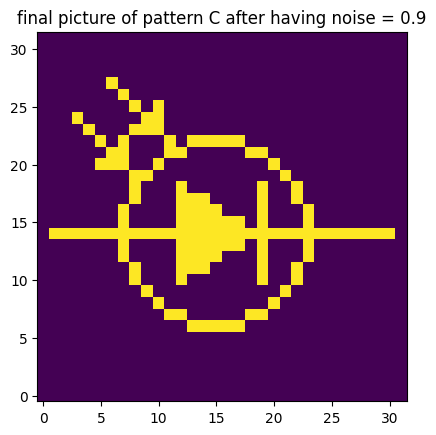

Noise = 1


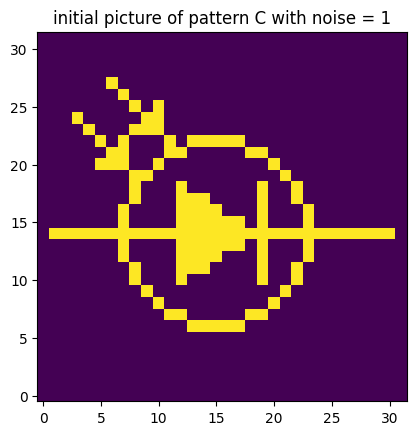

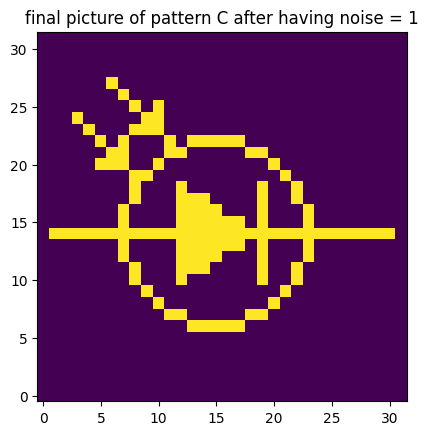

AttributeError: 'Text' object has no property 'Fontsize'

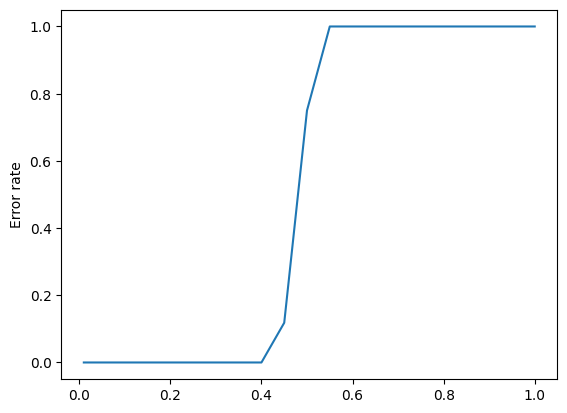

In [17]:
# pattern 3

max_iteration = 5000
the_flipping_rates = [0.01,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.9,1]
data3_initial = patterns[2]
error = []
for elt in the_flipping_rates:
    data3 = flipping(patterns[2],elt)
    print("Noise = " + str(elt))
    X, _ = training(weight, np.array([data3]), max_iteration)
    vect = data3_initial - X
    error.append(np.mean(np.where(vect == 0, 0, 1)))
    display(np.array([data3]), "initial picture of pattern C with noise = "+ str(round(elt,2)))
    display(X, "final picture of pattern C after having noise = " + str(round(elt,2)))

plt.plot(the_flipping_rates, error)
plt.ylabel('Error rate', Fontsize = 14)
plt.grid()
plt.xlabel('Noise rate', Fontsize = 14)

In [ ]:
# With less iterations

max_iteration = 10
the_flipping_rates = [0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.9,1]
data1_initial = patterns[0]
error = []
for elt in the_flipping_rates:
    data1 = flipping(patterns[0],elt)
    print("Noise = " + str(elt))
    X, _ = training(weight, np.array([data1]), max_iteration)
    vect = data1_initial - X
    error.append(np.mean(np.where(vect == 0, 0, 1)))
    display(np.array([data1]), "initial picture of pattern A with noise = "+ str(round(elt,2)))
    display(X, "final picture of pattern A after having noise = " + str(round(elt,2)))

plt.plot(the_flipping_rates, error)
plt.ylabel('Error rate', Fontsize = 14)
plt.grid()
plt.xlabel('Noise rate', Fontsize = 14)

- With less iterations, it is less likely to converge towards the wrong attractor

3.6 Sparse Patterns

In [110]:
def average_activity(X):
    P = X.shape[0]
    N = X.shape[1]
    return np.sum(X)*(1/(N*P))

def compute_weights_sparse(X):
    P = X.shape[0]
    N = X.shape[1]
    rho = average_activity(X)*np.ones((P,N), dtype=int)
    return (1/N)*(X-rho).T @ (X-rho)


def sgnWX_sparse(W,X,theta,i):
    return 0.5*np.ones((X.shape[1])) + 0.5*np.where(W@X[i] - theta*np.ones((X.shape[1])) >= 0, 1, -1)


def training_sparse(weight,pattern, theta, max_iteration=100):
    W = weight.copy()
    X = pattern.copy()
    count = 0

    while (count <= max_iteration):
        fixed_point_idx_list = []
        for i in range(X.shape[0]):
            #print(X.shape[0])
            #print(X.shape[1])
            #print(X)
            if (sgnWX_sparse(W, X, theta,i) == X[i]).all: # W = sgn(WX) ?
                #print("A fixed point has been reached !")
                fixed_point_idx_list.append(i)
            
            X[i] = sgnWX_sparse(W, X, theta, i) #Update rule
        count+=1
    return X, fixed_point_idx_list
    

In [91]:
"""A = np.zeros((32,32))
print(A)

def sparse_pattern(activity):
    A = np.zeros((32,32))
    nb_pixels = np.floor(activity*1024)
    for i in range(32):
        for j in range(32):"""

def active_patterns(size, num_patterns=1, active_num=0.1):
    positions = np.arange(0, size * num_patterns)
    np.random.shuffle(positions)
    result = np.zeros(size * num_patterns)
    for i in range(round(active_num * (size * num_patterns))):
        result[positions[i]] = 1
    return np.array(result).reshape(-1, size)


def generate_patterns(size,nb_patterns, activity=0.1):
    patt = active_patterns(size,nb_patterns, activity)
    return patt



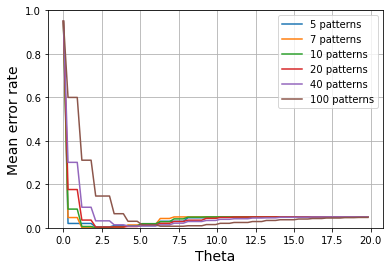

In [173]:

nb_of_patterns = [5,7,10,20,40,100]

Theta = list(np.arange(0,20,0.3))

the_global_errors = []


for elt in nb_of_patterns:
    global_error = []
    pattern = generate_patterns(100,elt,0.05)
    weight = compute_weights(pattern) 
    for theta in Theta:
        error = 0
        for i in range(len(pattern)):
            X,_ = training_sparse(weight, np.array([pattern[i]]), theta)
            vect = pattern[i] - X
            error += (np.mean(np.where(vect == 0, 0, 1)))
        global_error.append(error/len(pattern))
    the_global_errors.append(global_error)


plt.figure()
for i in range(len(the_global_errors)):
    plt.plot(Theta, the_global_errors[i], label= str(nb_of_patterns[i]) + ' patterns')
plt.grid()
plt.xlabel('Theta', fontsize = 14)
plt.ylim([0,1])
plt.ylabel('Mean error rate', fontsize = 14)
plt.legend()
plt.show()

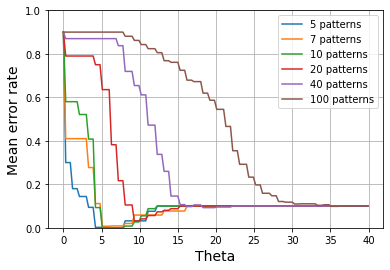

In [161]:

nb_of_patterns = [5,7,10,20,40,100]

Theta = list(np.arange(0,40,0.3))

the_global_errors = []


for elt in nb_of_patterns:
    global_error = []
    pattern = generate_patterns(100,elt,0.1)
    weight = compute_weights(pattern) 
    for theta in Theta:
        error = 0
        for i in range(len(pattern)):
            X,_ = training_sparse(weight, np.array([pattern[i]]), theta)
            vect = pattern[i] - X
            error += (np.mean(np.where(vect == 0, 0, 1)))
        global_error.append(error/len(pattern))
    the_global_errors.append(global_error)


plt.figure()
for i in range(len(the_global_errors)):
    plt.plot(Theta, the_global_errors[i], label= str(nb_of_patterns[i]) + ' patterns')
plt.grid()
plt.xlabel('Theta', fontsize = 14)
plt.ylim([0,1])
plt.ylabel('Mean error rate', fontsize = 14)
plt.legend()
plt.show()

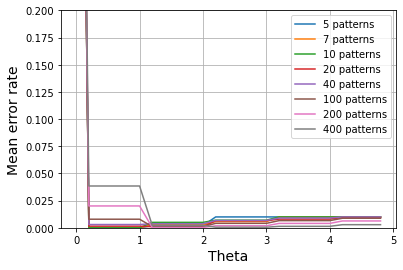

In [176]:

nb_of_patterns = [5,7,10,20,40,100,200,400]

Theta = list(np.arange(0,5,0.2))

the_global_errors = []


for elt in nb_of_patterns:
    global_error = []
    pattern = generate_patterns(100,elt,0.01)
    weight = compute_weights(pattern) 
    for theta in Theta:
        error = 0
        for i in range(len(pattern)):
            X,_ = training_sparse(weight, np.array([pattern[i]]), theta, 0)
            vect = pattern[i] - X
            error += (np.mean(np.where(vect == 0, 0, 1)))
        global_error.append(error/len(pattern))
    the_global_errors.append(global_error)


plt.figure()
for i in range(len(the_global_errors)):
    plt.plot(Theta, the_global_errors[i], label= str(nb_of_patterns[i]) + ' patterns')
plt.grid()
plt.xlabel('Theta', fontsize = 14)
plt.ylim([0,0.2])
plt.ylabel('Mean error rate', fontsize = 14)
plt.legend()
plt.show()